# Gradient Descent for Logistic regression

In [4]:
import copy, math
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_common import dlc, plot_data, sigmoid, compute_cost_logistic
from plt_quad_logistic import plt_quad_logistic, plt_prob
plt.style.use('./deeplearning.mplstyle')

In [5]:
#data set
X_train = np.array([[0.5,1.5],[1,1],[1.5,0.5],[3,0.5],[2,2],[1,2.5]])
y_train = np.array([0,0,0,1,1,1])

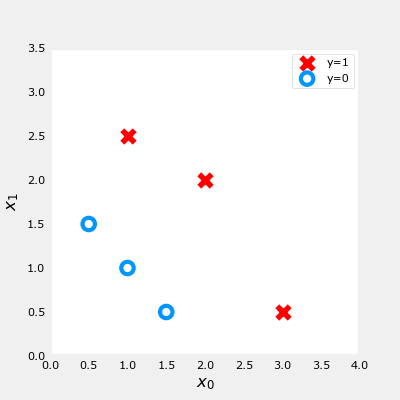

In [9]:
fig, ax = plt.subplots(1,1,figsize = (4,4))
plot_data(X_train, y_train,ax)

ax.axis([0,4,0,3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$',fontsize=12)
plt.show()

In [10]:
def compute_gradient_logistic(X,y,w,b):
    m,n = X.shape
    #m is the number of training examples
    #n is the number of features or input features
    dj_dw = np.zeros((n))
    dj_db = 0
    
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)
        #error value calculation between calculated f_wb_i and y[i] which is common for both dj_dw and dj_db
        err_i = f_wb_i - y[i]
        for j in range(n):
            #j here represents the looping through the loop
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_db, dj_dw

In [12]:
X_tmp = np.array([[0.5,1.5],[1,1],[1.5,0.5],[3,0.5],[2,2],[1,2.5]])
y_tmp = np.array([0,0,0,1,1,1])
w_tmp = np.array([2,3])
b_tmp = 1
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db : {dj_db_tmp}")
print(f"dj_dw : {dj_dw_tmp}")

dj_db : 0.49861806546328574
dj_dw : [0.5 0.5]


In [13]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    # J is the array to store the cost and w values
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        #calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)
        
        #update the parameters of w and b
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        
        #save cost J at each iteration
        if i<100000:
            J_history.append(compute_cost_logistic(X,y,w,b))
            
        #print cost at every 10 iterations
        if i%math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}")
            
    return w,b, J_history

In [17]:
w_tmp = np.zeros_like(X_train[0])
b_tmp = 0
alpha = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alpha, iters)
print(f"\nUpdated parameters w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574
Iteration 1000: Cost 0.1590977666870456
Iteration 2000: Cost 0.08460064176930081
Iteration 3000: Cost 0.05705327279402531
Iteration 4000: Cost 0.042907594216820076
Iteration 5000: Cost 0.034338477298845684
Iteration 6000: Cost 0.028603798022120097
Iteration 7000: Cost 0.024501569608793
Iteration 8000: Cost 0.02142370332569295
Iteration 9000: Cost 0.019030137124109114

Updated parameters w:[5.28 5.08], b:-14.222409982019837


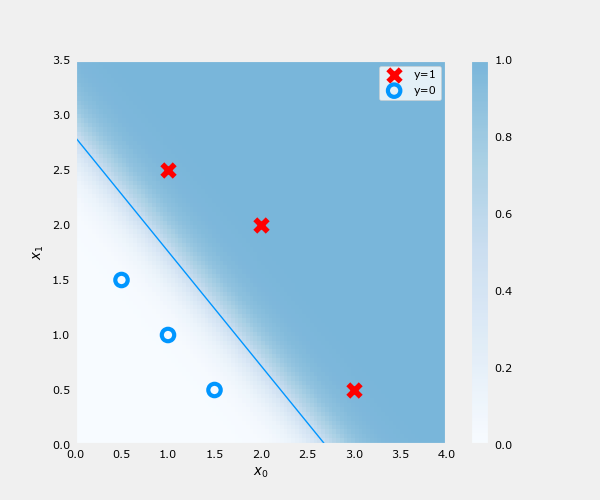

In [24]:
#plotting the results of gradient descent
fig, ax = plt.subplots(1,1, figsize = (6,5))

#plotting the probability
plt_prob(ax, w_out, b_out)

#plotting the original data
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
ax.axis([0,4,0,3.5])
plot_data(X_train, y_train, ax)

#plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0], c = dlc["dlblue"], lw=1)
plt.show()